## Análisis de partidas - League of Legends

In [2]:
import requests
import json
from bs4 import BeautifulSoup
import cassiopeia as cass

# Cambiar RIOT API KEY, este lo puedes obtener en https://developer.riotgames.com
RIOT_API_KEY = "RGAPI"

CPConfig = cass.Settings({'global': {'version_from_match': 'latest'}})
cass.apply_settings(CPConfig)
cass.set_riot_api_key(RIOT_API_KEY)

# Cambiar por los datos del usuario a analizar
CONTINENT = "americas"
RIOT_ID = "baccaKEGW"
TAG = "NA1"
REGION = "NA"

URL = f"https://{CONTINENT}.api.riotgames.com/riot/account/v1/accounts/by-riot-id/{RIOT_ID}/{TAG}?api_key={RIOT_API_KEY}"

page = requests.get(URL)
soup = BeautifulSoup(page.content, "html.parser")
json_data = soup.get_text()
data = json.loads(json_data)
puuid = data["puuid"]

summoner = cass.Summoner(puuid=puuid, region=REGION)

In [3]:
import pandas as pd
from datetime import timedelta

df = []
win = {False: "Loss", True: "Win"}
bin = {False: 0, True: 1}
lanes = {"top_lane": "Top Lane", "jungle": "Jungle", "mid_lane": "Mid Lane", "bot_lane": "Bottom Lane", "utility": "Utility"}

# Loop para extraer los datos de cada partida, se puede asignar la cantidad en summoner.match_history

for match in summoner.match_history[0:65]:
    
    players = match.participants
    if match.is_remake:
        pass
    elif match.duration < timedelta(minutes=15, seconds=30):
        pass
    else:
        # Cambiar por el tipo de partida, en este análisis utilizaré ranked de solo queue y flexibles
        if match.queue.name == "ranked_solo_fives" or match.queue.name == "ranked_flex_fives":
            try:
                for x in players:
                    is_user = "user" if x.summoner.puuid == puuid else "other"
                    df.append((match.id, x.champion.name, is_user, lanes[x.lane.name], x.stats.kills, x.stats.deaths, x.stats.assists, round(x.stats.kda,2), win[x.stats.win], x.side.name, match.queue.name, bin[x.stats.first_blood_kill], bin[x.stats.first_tower_kill], x.stats.gold_earned, x.stats.total_minions_killed, x.stats.vision_score, x.stats.vision_wards_bought, x.stats.time_played, x.stats.longest_time_spent_living))
            except KeyError:
                pass
        else:
            pass
        
# Creación del DataFrame
df = pd.DataFrame(df, columns=["Match ID", "Champion", "Is_User", "Lane", "Kills", "Deaths", "Assists", "KDA", "Is_Win", "Side", "Match Type", "First Blood", "First Tower", "Gold", "Minions", "Ward Score","Pink Wards","Match Duration", "Longest Time Lived"])
df = df.set_index("Match ID")
df.Side = df.Side.str.capitalize()

Making call: https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/EKXctjAFCs1bsL8_jMk-oFtSJVZsOGlapFzGD-bMBNbPFk2HxDx-pd5G5YBLi-cND5t0jEO9AjkFoA/ids?start=0&count=100
Making call: https://americas.api.riotgames.com/lol/match/v5/matches/NA1_5006433554
Making call: https://ddragon.leagueoflegends.com/realms/na.json
Making call: https://ddragon.leagueoflegends.com/cdn/14.10.1/data/en_US/championFull.json
Making call: https://americas.api.riotgames.com/lol/match/v5/matches/NA1_5006369543
Making call: https://americas.api.riotgames.com/lol/match/v5/matches/NA1_5006344365
Making call: https://americas.api.riotgames.com/lol/match/v5/matches/NA1_5006340848
Making call: https://americas.api.riotgames.com/lol/match/v5/matches/NA1_5006273266
Making call: https://americas.api.riotgames.com/lol/match/v5/matches/NA1_5005762739
Making call: https://americas.api.riotgames.com/lol/match/v5/matches/NA1_5005596097
Making call: https://americas.api.riotgames.com/lol/match/v5/matches/NA1_500557

In [4]:
# Quitar # para guardar los datos en un csv
#df.to_csv("leagueoflegendsdata.csv")

# Lectura de CSV anteriormente guardado
# pd.read_csv("leagueoflegendsdata.csv")

# Revisión del dataframe
df

,Champion,Is_User,Lane,Kills,Deaths,Assists,KDA,Is_Win,Side,Match Type,First Blood,First Tower,Gold,Minions,Ward Score,Pink Wards,Match Duration,Longest Time Lived
Match ID,,,,,,,,,,,,,,,,,,
5006433554,Gangplank,user,Top Lane,6,5,5,2.20,Win,Blue,ranked_solo_fives,0,0,12986,191,8,0,1570,672
5006433554,Jarvan IV,other,Jungle,2,1,7,9.00,Win,Blue,ranked_solo_fives,0,0,9607,12,34,2,1570,1188
5006433554,Yasuo,other,Mid Lane,3,0,1,4.00,Win,Blue,ranked_solo_fives,1,0,10864,236,20,1,1570,0
5006433554,Jinx,other,Bottom Lane,4,2,8,6.00,Win,Blue,ranked_solo_fives,0,0,11565,210,24,2,1570,845
5006433554,Xerath,other,Utility,7,2,9,8.00,Win,Blue,ranked_solo_fives,0,1,9630,42,64,5,1570,599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000679608,Gangplank,user,Top Lane,0,7,4,0.57,Loss,Red,ranked_solo_fives,0,0,9683,191,16,1,1456,449
5000679608,Graves,other,Jungle,5,11,6,1.00,Loss,Red,ranked_solo_fives,1,0,10433,37,21,2,1456,263
5000679608,Katarina,other,Mid Lane,8,9,3,1.22,Loss,Red,ranked_solo_fives,0,0,10256,137,10,0,1456,331


In [5]:
# Función para contar winrates de campeones, posición y equipo
def contar(data, x, user):
    df_base = data[(data["Is_User"] == user)][x].value_counts()
    df_final = pd.DataFrame(df_base, columns=["Winrate", "Games"])
    df_final["Winrate"] = (data[(data["Is_User"] == user) & (df["Is_Win"] == "Win")][x].value_counts() / df_base)
    df_final["Games"] = df[(df["Is_User"] == user)][x].value_counts()
    df_final["Winrate"] = df_final["Winrate"].fillna(0)
    df_final.sort_values("Winrate", axis=0, ascending=False, inplace=True)
    
    return df_final

In [6]:
# Función para contar winrate por primera sangre y primera torre
def first_count(user_won, allies_won, user, first):
    p = {"u": "user", "o": "other", "w": "Win", "l": "Loss", "fp": "First Blood", "ft": "First Tower"}
    x = df[(df["Is_User"] == p[user]) & (df[p[first]] == 1) & (df["Is_Win"] == p[allies_won]) & (df.index.isin(user_won.index.unique()))][p[first]].count()
    return x

wins = df[(df["Is_User"] == "user") & (df["Is_Win"] == "Win")]
losses = df[(df["Is_User"] == "user") & (df["Is_Win"] == "Loss")]

w_ward_team = df[(df["Is_Win"] == "Win") & (df.index.isin(wins.index.unique()))].groupby("Match ID").sum("Ward Score")
w_ward_enemy = df[(df["Is_Win"] == "Loss") & (df.index.isin(wins.index.unique()))].groupby("Match ID").sum("Ward Score")
wins_ward = (w_ward_team["Ward Score"] - w_ward_enemy["Ward Score"])

l_ward_team = df[(df["Is_Win"] == "Loss") & (df.index.isin(losses.index.unique()))].groupby("Match ID").sum("Ward Score")
l_ward_enemy = df[(df["Is_Win"] == "Win") & (df.index.isin(losses.index.unique()))].groupby("Match ID").sum("Ward Score")
losses_ward = (l_ward_team["Ward Score"] - l_ward_enemy["Ward Score"])

x = contar(data=df, x="Champion", user="user")

print("Partidas en total:", x.Games.sum(), "Winrate:", round(sum(x.Games * x.Winrate / x.Games.sum()), 2), "% \n")
print("% de ganar una partida con primera sangre:", round(first_count(wins,"w","u","fp") / (first_count(wins,"w","u","fp") + first_count(losses,"l","u","fp")),2),"% \n",
      "% de ganar una partida cuando el equipo obtiene primera sangre:", round(first_count(wins,"w","o","fp") / (first_count(wins,"w","o","fp") + first_count(losses,"l","o","fp")),2),"% \n",
      "% de ganar una partida cuando el equipo enemigo obtiene primera sangre:", round(first_count(wins,"l","o","fp") / (first_count(wins,"l","o","fp") + first_count(losses,"w","o","fp")),2),"% \n",
      "\n",
      "% de ganar una partida con primera torre:", round(first_count(wins,"w","u","ft") / (first_count(wins,"w","u","ft") + first_count(losses,"l","u","ft")),2),"% \n", 
      "% de ganar una partida cuando el equipo obtiene primera torre:", round(first_count(wins,"w","o","ft") / (first_count(wins,"w","o","ft") + first_count(losses,"l","o","ft")),2),"% \n",
      "% de ganar una partida cuando el equipo enemigo obtiene primera torre:", round(first_count(wins,"l","o","ft") / (first_count(wins,"l","o","ft") + first_count(losses,"w","o","ft")),2),"% \n",
      "\n",
      "% de ganar una partida al tener mejor vision que el equipo enemigo:", round(wins_ward[(wins_ward > 0)].count() / (wins_ward[(wins_ward > 0)].count() + losses_ward[(losses_ward > 0)].count()),2),"%")


Partidas en total: 59 Winrate: 0.56 % 

% de ganar una partida con primera sangre: 0.56 % 
 % de ganar una partida cuando el equipo obtiene primera sangre: 0.47 % 
 % de ganar una partida cuando el equipo enemigo obtiene primera sangre: 0.61 % 
 
 % de ganar una partida con primera torre: 0.82 % 
 % de ganar una partida cuando el equipo obtiene primera torre: 0.71 % 
 % de ganar una partida cuando el equipo enemigo obtiene primera torre: 0.33 % 
 
 % de ganar una partida al tener mejor vision que el equipo enemigo: 0.81 %


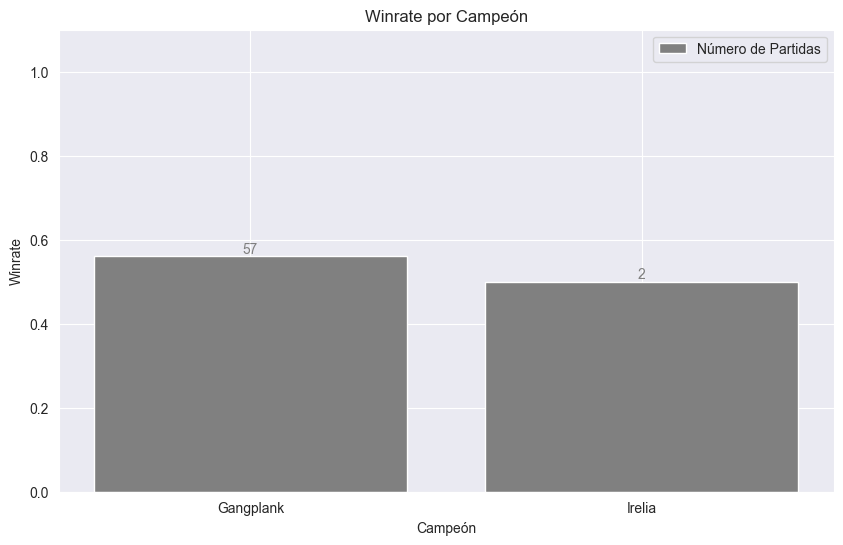

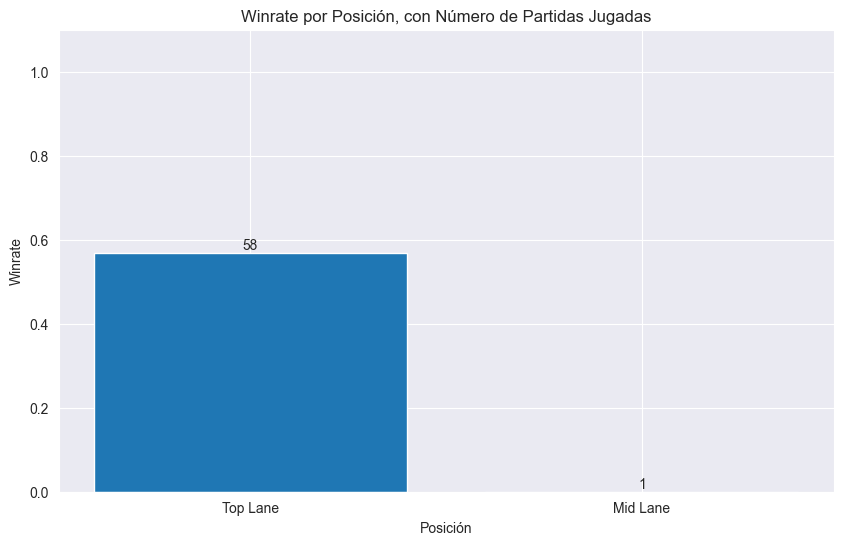

In [7]:
import matplotlib.pyplot as plt

# Cambiar el número de min_games_user, desde que cantidad de partidas se considerará el winrate de un Campeón
min_games_user = 1

x = contar(data=df, x="Champion", user="user")
x = x[x.Games > min_games_user].iloc[0:10]

plt.figure(figsize=(10, 6))
bars = plt.bar(x.index, x.Winrate, color="grey", label="Número de Partidas")

for bar, partidas in zip(bars, x.Games):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(partidas), ha="center", va="bottom", color="grey")

plt.xlabel("Campeón")
plt.ylabel("Winrate")
plt.title("Winrate por Campeón")
plt.ylim(0, 1.1)
plt.legend()

plt.savefig("graficos/champ_winrate.png")

x = contar(data=df, x="Lane", user="user")
colors = ["C0", "C1", "C2", "C3", "C4"]

plt.figure(figsize=(10, 6))
bars = plt.bar(x.index, x.Winrate, color=colors)

for bar, partidas in zip(bars, x.Games):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(partidas), ha="center", va="bottom")

plt.xlabel("Posición")
plt.ylabel("Winrate")
plt.title('Winrate por Posición, con Número de Partidas Jugadas')
plt.ylim(0, 1.1)

plt.savefig("graficos/lane_winrate.png");

In [8]:
# Función para contar winrate por campeones
def winrate_champs(a,b,c):

    wins = df[(df["Is_User"] == "user") & (df["Is_Win"] == "Win")]
    victory_matches = wins.index.unique()
    enemy_loss_matches = df[(df.index.isin(victory_matches)) & (df["Is_User"] == "other") & (df["Is_Win"] == a)]
    enemy_loss_count = enemy_loss_matches["Champion"].value_counts()
    
    defeats = df[(df["Is_User"] == "user") & (df["Is_Win"] == "Loss")]
    defeats_matches = defeats.index.unique()
    enemy_win_matches = df[(df.index.isin(defeats_matches)) & (df["Is_User"] == "other") & (df["Is_Win"] == b)]
    enemy_win_count = enemy_win_matches["Champion"].value_counts()
    
    enemy_total = enemy_win_count.add(enemy_loss_count, fill_value=0)
    
    enemy_win = pd.DataFrame(enemy_win_count)
    enemy_win["total"] = enemy_total
    enemy_win.fillna(0, inplace=True)
    enemy_win["winrate"] = abs(c-(enemy_win["count"] / enemy_win.total))
    enemy_win.sort_values("winrate", ascending=True, inplace=True)
    return enemy_win

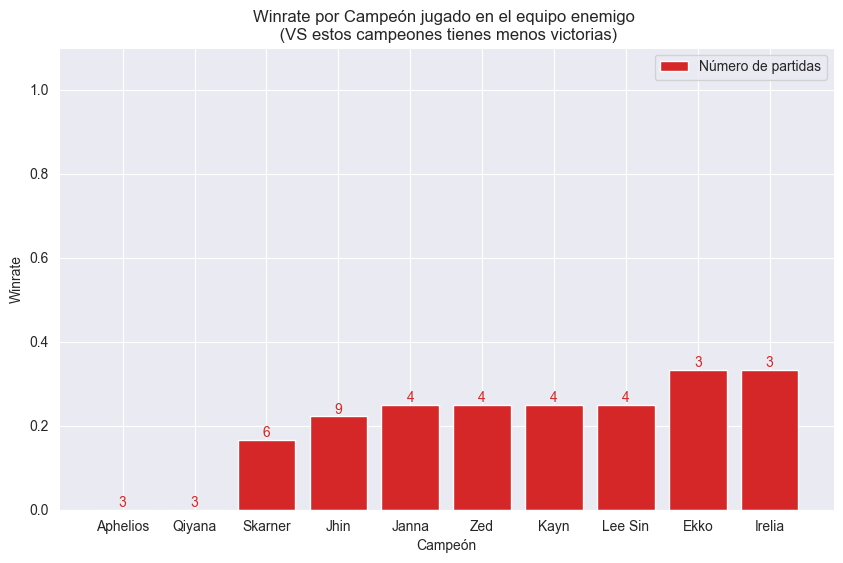

In [9]:
# Cambiar el número de min_games, desde que cantidad de partidas se considerará el winrate del usuario
min_games = 2

x = winrate_champs("Loss","Win",1)
x = x[(x.total > min_games)].iloc[0:10]

plt.figure(figsize=(10, 6))
bars = plt.bar(x.index, x.winrate, color="C3", label="Número de partidas")

for bar, partidas in zip(bars, x.total):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(partidas), ha="center", va="bottom", color="C3")

plt.xlabel("Campeón")
plt.ylabel("Winrate")
plt.title("Winrate por Campeón jugado en el equipo enemigo \n (VS estos campeones tienes menos victorias)")
plt.legend(loc="upper right")
plt.ylim(0, 1.1)

plt.savefig("graficos/vs_champs_negative_winrate.png");

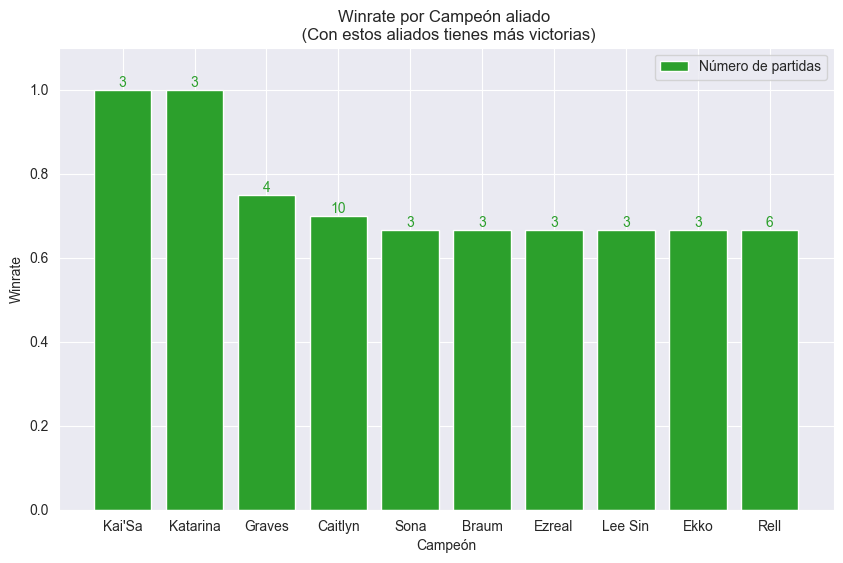

In [10]:
x = winrate_champs("Win","Loss",0).sort_values("winrate", ascending=False)
x = x[(x.total > min_games)].iloc[0:10]

plt.figure(figsize=(10, 6))
bars = plt.bar(x.index, x.winrate, color="C2", label="Número de partidas")

for bar, partidas in zip(bars, x.total):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(partidas), ha="center", va="bottom", color="C2")

plt.xlabel("Campeón")
plt.ylabel("Winrate")
plt.title("Winrate por Campeón aliado \n (Con estos aliados tienes más victorias)")
plt.legend(loc="upper right")
plt.ylim(0, 1.1)

plt.savefig("graficos/with_allies_positive_winrate.png");

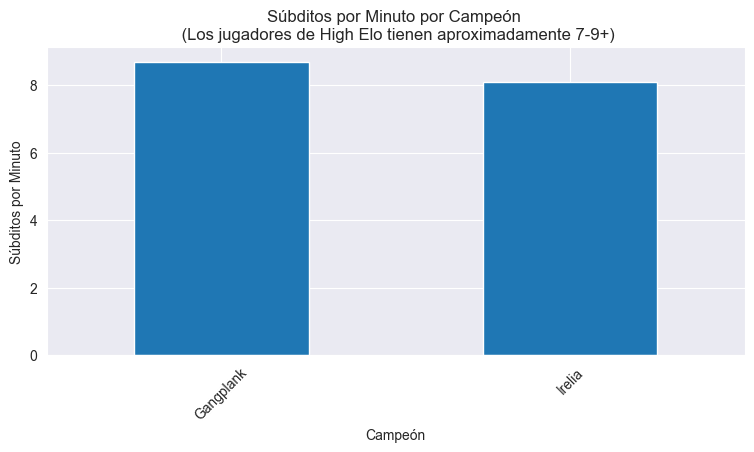

In [11]:
creep_score = df[df["Is_User"] == "user"][["Champion", "Minions", "Match Duration"]]
creep_score["Minions per Minute"] = creep_score.Minions / ((creep_score["Match Duration"]-120) / 60)
creep_score.set_index("Champion", inplace=True)

plt.figure(figsize=(9, 4))

creep_score["Minions per Minute"].groupby("Champion").mean().sort_values(ascending=False).iloc[0:8].plot.bar()

plt.xlabel("Campeón")
plt.ylabel("Súbditos por Minuto")
plt.title("Súbditos por Minuto por Campeón \n (Los jugadores de High Elo tienen aproximadamente 7-9+)")
plt.xticks(rotation=45)

plt.savefig("graficos/minions_per_min.png", bbox_inches="tight");

## Otros datos

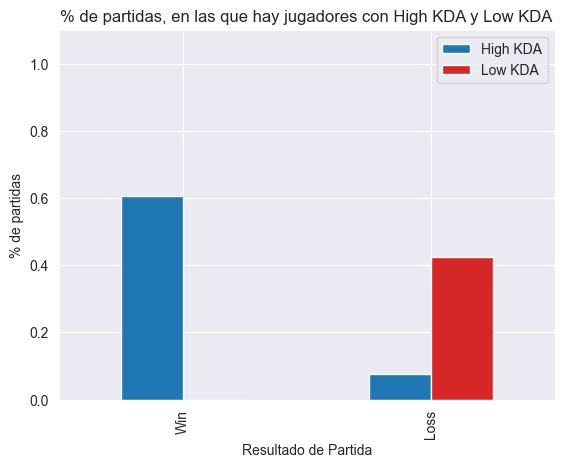

In [12]:
# Cambiar LOW_KDA por el score que considera el usuario como "bajo"
LOW_KDA = 0.8

low_kda_users_w = df[(df["Is_User"] == "other") & (df["KDA"] < LOW_KDA) & (df["Is_Win"] == "Win") & (df.index.isin(wins.index.unique()))]
low_kda_users_l = df[(df["Is_User"] == "other") & (df["KDA"] < LOW_KDA) & (df["Is_Win"] == "Loss") & (df.index.isin(losses.index.unique()))]

# Cambiar HIGH_KDA por el score que considera el usuario como "alto"
HIGH_KDA = 6

high_kda_users_w = df[(df["Is_User"] == "other") & (df["KDA"] > HIGH_KDA) & (df["Is_Win"] == "Win") & (df.index.isin(wins.index.unique()))]
high_kda_users_l = df[(df["Is_User"] == "other") & (df["KDA"] > HIGH_KDA) & (df["Is_Win"] == "Loss") & (df.index.isin(losses.index.unique()))]

end_kda_df = [("Win",high_kda_users_w.index.nunique()/wins.index.nunique(),low_kda_users_w.index.nunique()/wins.index.nunique()),
              ("Loss",high_kda_users_l.index.nunique()/losses.index.nunique(),low_kda_users_l.index.nunique()/losses.index.nunique())]
end_kda_df = pd.DataFrame(end_kda_df, columns=["Match","High KDA","Low KDA"])
end_kda_df.set_index("Match", inplace=True)

end_kda_df.plot.bar(color=["C0","C3"])

plt.xlabel("Resultado de Partida")
plt.ylabel("% de partidas")
plt.title("% de partidas, en las que hay jugadores con High KDA y Low KDA")
plt.ylim(0, 1.1)

plt.savefig("graficos/players_high_low_kda.png", bbox_inches="tight");

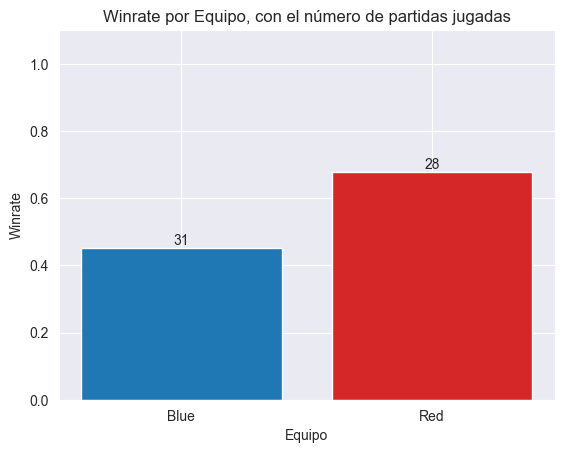

In [13]:
x = contar(data=df, x="Side", user="user")
sort = ["Blue", "Red"]
x.index = pd.CategoricalIndex(x.index, categories=sort, ordered=True)
x.sort_index(inplace=True)

bars = plt.bar(x.index, x.Winrate, color=['C0', "C3"])

for bar, partidas in zip(bars, x.Games):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(partidas), ha="center", va="bottom")

plt.xlabel("Equipo")
plt.ylabel("Winrate")
plt.title("Winrate por Equipo, con el número de partidas jugadas")
plt.ylim(0, 1.1)

plt.savefig("graficos/side_winrate.png");

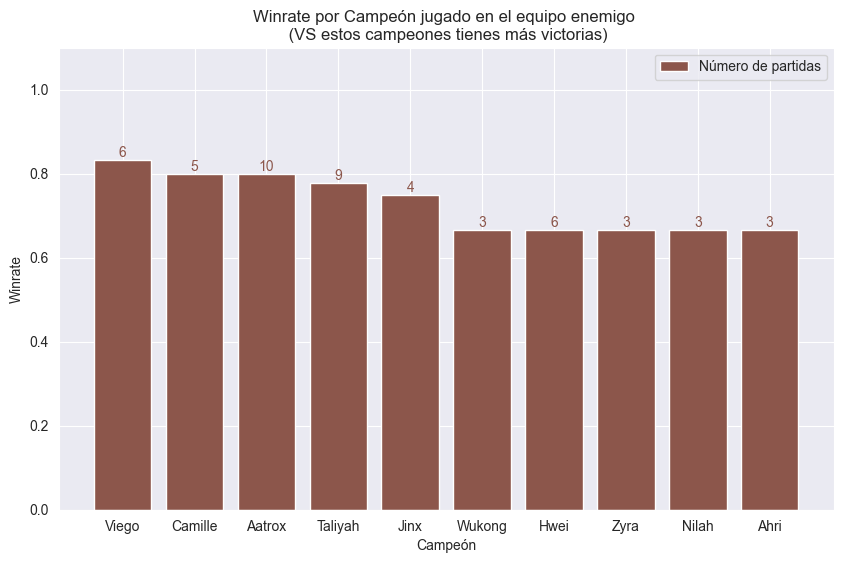

In [14]:
x = winrate_champs("Loss","Win",1).sort_values("winrate",ascending=False)
x = x[(x.total > min_games)].iloc[0:10]

plt.figure(figsize=(10, 6))
bars = plt.bar(x.index, x.winrate, color="C5", label="Número de partidas")

for bar, partidas in zip(bars, x.total):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(partidas), ha="center", va="bottom", color="C5")

plt.xlabel("Campeón")
plt.ylabel("Winrate")
plt.title("Winrate por Campeón jugado en el equipo enemigo \n (VS estos campeones tienes más victorias)")
plt.legend(loc="upper right")
plt.ylim(0, 1.1)

plt.savefig("graficos/vs_champs_positive_winrate.png");

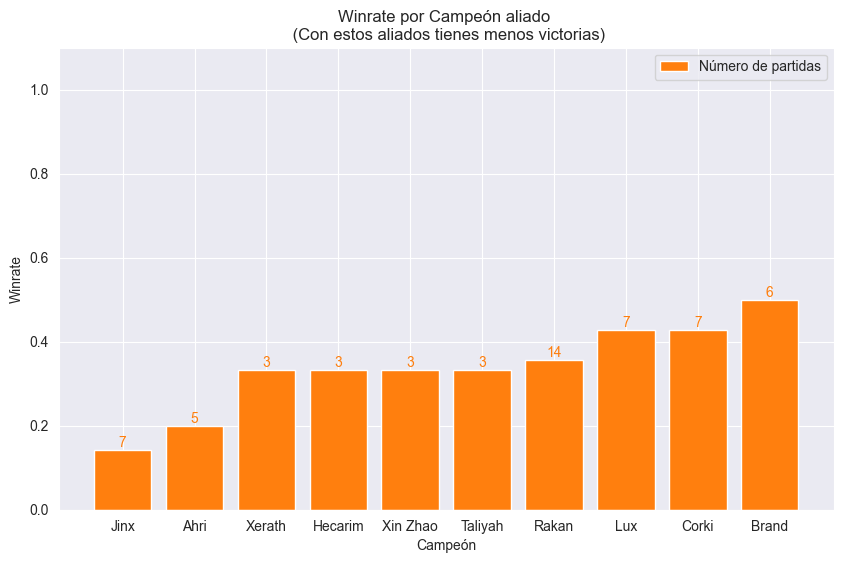

In [15]:
x = winrate_champs("Win","Loss",0).sort_values("winrate",ascending=True)
x = x[(x.total > min_games)].iloc[0:10]

plt.figure(figsize=(10, 6))
bars = plt.bar(x.index, x.winrate, color="C1", label="Número de partidas")

for bar, partidas in zip(bars, x.total):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(partidas), ha="center", va="bottom", color="C1")

plt.xlabel("Campeón")
plt.ylabel("Winrate")
plt.title("Winrate por Campeón aliado \n (Con estos aliados tienes menos victorias)")
plt.legend(loc="upper right")
plt.ylim(0, 1.1)

plt.savefig("graficos/with_allies_negative_winrate.png");

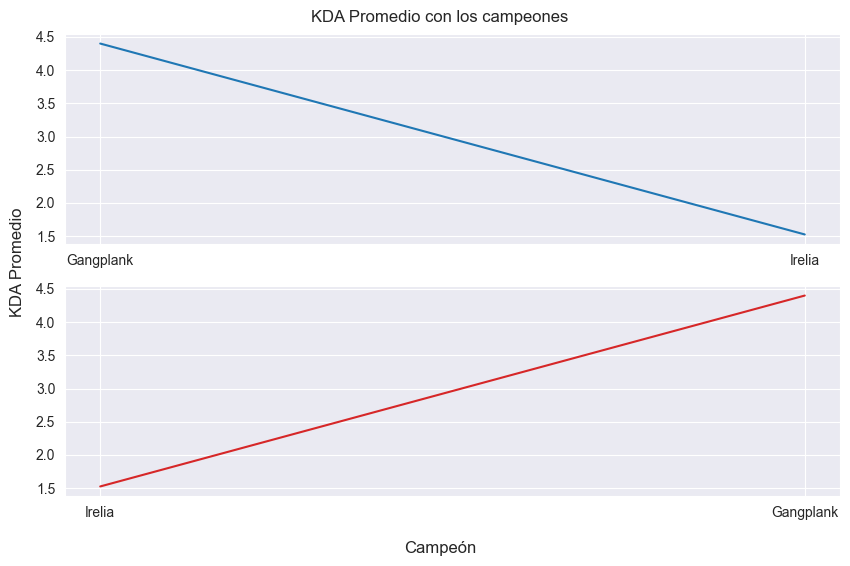

In [16]:
import seaborn as sns

user_games = df[df["Is_User"] == "user"]
user_kda = user_games.groupby("Champion")["KDA"].mean()
user_kda1 = user_kda.sort_values(ascending=True).nlargest(8)

fig, axs = plt.subplots(nrows=2, figsize=[10,6])
sns.lineplot(data=user_kda1, color="C0", ax=axs[0])

user_kda2 = user_kda.sort_values(ascending=False).nsmallest(8)

sns.lineplot(data=user_kda2, color="C3", ax=axs[1])

axs[0].set(xlabel=None, ylabel=None)
axs[1].set(xlabel=None, ylabel=None)
fig.supylabel("KDA Promedio", x=0.07)
fig.supxlabel("Campeón")
fig.suptitle("KDA Promedio con los campeones", y=0.92)
fig.savefig("graficos/user_kdamean.png");

### Espero que este proyecto te haya sido util!, si deseas, puedes darle una estrella a mi proyecto en github  https://github.com/1bryanvalenzuela/lol-simple-analysis !, muchas gracias.